# **Capstone Project for 2nd Module in Purwadhika**
#### This project dataset is about New York City Taxi & Limousine Trip Record

## **I. Data Background**

The **Taxi & Limousine Commission (TLC)** serves as a pivotal regulatory agency entrusted with the oversight and regulation of taxi and for-hire vehicle services in various cities and regions. Although the specific scope of its responsibilities may vary depending on the location, its primary mission remains consistent: to ensure the safety, quality, and legality of transportation services. The TLC plays a crucial role in striking a balance between the interests of passengers and service providers while fostering a well-regulated and efficient transportation ecosystem.

#### **Stakeholders**

The primary regulatory authority in New York City, known as the **Taxi & Limousine Commission (NYC TLC)**, holds a central position among the stakeholders. This agency is responsible for governing and supervising taxi and for-hire vehicle services within the city's confines. Additionally, **New York Taxi and Limousine Companies**, which operate in the city but fall outside the direct purview of the TLC, are essential contributors to the taxi and for-hire vehicle landscape. They play a vital role in providing transportation services to the public. Collaboratively, the **New York City Department of Transportation (DOT)** and the NYC TLC manage and maintain the city's transportation infrastructure, encompassing roadways, bridges, and traffic flow. Their collaborative efforts aim to ensure not only the safety but also the efficiency of transportation systems in New York City.

#### **The Dataset**

The dataset under examination for this analysis traces its origins back to the **New York City Taxi & Limousine Commission (NYC TLC)**. However, it has been compiled by two key players in the **Livery Passenger Enhancement Program (LPEP)**: **Creative Mobile Technologies** and **VeriFone**. This dataset constitutes an extensive collection of records chronicling taxi and for-hire vehicle journeys within the bustling and vibrant landscape of New York City.

#### **Problems and Objectives**

1. **Service Quality and Passenger Satisfaction**: At the heart of the taxi and for-hire vehicle industry lies the quality of service, a core factor impacting passenger satisfaction. By delving into payment type data, this analysis seeks to get insights that can drive enhancements in passenger experiences.

2. **Fare Structure Optimization**: Opportunities to optimize fare structures are investigated, with the ultimate goal of benefiting both passengers and service providers. This examination aims to identify potential improvements within pricing models.

3. **Trip Duration and Efficiency**: A meticulous examination of trip duration and route efficiency is vital for comprehending their repercussions on fare amounts and passenger satisfaction. Insights drawn from this analysis can lay the foundation for route optimization and reductions in travel time.

4. **Regulatory Compliance**: The imperative of regulatory compliance looms large, especially concerning adherence to regulations and surcharges. This analysis is centered on evaluating the industry's commitment to meeting these regulatory obligations.

5. **Congestion Surcharge Impact**: The 2019 introduction of the congestion surcharge potentially exerts influence on trip patterns and fare amounts. This study endeavors to ascertain the extent of its impact on the transportation landscape.

6. **Demand Forecasting**: Accurate predictions of demand patterns are indispensable for optimizing service availability and pricing strategies. This research seeks to contribute to the realization of a more efficient transportation system through precise demand forecasting.


## **II. Data Cleaning**

####  **a. Original Columns**
Consist of 20 Columns

| Feature | Description |
| --- | --- |
| VendorID | LPEP Provider Code that provided the record. <br> 1. Creative Mobile Technologies, LLC <br> 2. VeriFone Inc.
| lpep_pickup_datetime | Date and Time when meter was engaged.
| lpep_dropoff_datetime | Date and Time when meter was disengaged.
| Passenger_count | Number of passengers in the vehicle, driver-entered value.
| Trip_distance | Elapsed distance in miles by the taximeter.
| PULocationID | TLC Taxi Zone where the taximeter was engaged.
| DOLocationID | TLC Taxi Zone where the taximeter was disengaged.
| RateCodeID | Final rate code in effect at the end of the code. <br> 1. Standard Rate <br> 2. JFK <br> 3. Newark <br> 4. Nassau/Westchester <br> 5. Negotiated Fare <br> 6. Grouped Ride
| Store_and_fwd_flag | This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. <br> Y = store and forward trip <br> N = not a store and forward trip
| Payment_type | A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip
| Fare_amount | The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges Currently, this only includes the 0.50 and 1 Dollar during rush hour and overnight charges.
| extra | Extra charges that covers e-hail service fee/TLC regulated tax/Rush hour extra/overnight extra/trip distance extra (Airports/Counties)
| MTA_tax | $0.50 MTA tax that is automatically triggered based on the metered rate in use.
| Improvement_surcharge | $0.30 improvement surcharge assessed on hailed trips at the flag drop, Used to improve for-hire vehicles services. Began in 2015.
| Tip_amount | This field is automatically populated for credit card tips. Cash tips are not included.
| Tolls_amount | The total amount of all tolls paid in the trip.
| ehail_fee | Extra charges when e-hail services are used. (This column has a missing value rate of 100%)
| Total_amount | The total amount charged to passengers. Does not include cash tips.
| Trip_type | A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. <br> 1 = Street-hail <br> 2 = Dispatch
| Congestion_surcharge | $2.50 congestion surcharge for peak traffic hours in Manhattan area. Began in 2019

#### **b. Library Import**

In [89]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss
import folium as fo

#### **c. Dataset Load**

In [90]:
tlc = pd.read_csv('NYC TLC Trip Record.csv')
tlc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


#### **d. Supporting Dataset Load for Regions**

In [91]:
tlc_zone = pd.read_csv('taxi+_zone_lookup.csv')
tlc_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


#### **e. Dataset Summary**

##### **Checking Dataset**

In [92]:
# Checking Null Values

tlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [93]:
# Since there are null values, showing summary of our data

list_data=[]
for col in tlc.columns:
    list_data.append([
        col,
        tlc[col].dtype,
        tlc[col].isna().sum(),
        round(tlc[col].isna().sum()/len(tlc)*100,2),
        tlc[col].nunique(),

        list(tlc[col].drop_duplicates().values)
    ])

pd.DataFrame(list_data,columns = ['dataFeatures','Data Type','null','nullPct','unique','Unique Sample'])

,dataFeatures,Data Type,null,nullPct,unique,Unique Sample
0,VendorID,int64,0,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,0.00,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0,0.00,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,4324,6.34,2,"[N, Y, nan]"
4,RatecodeID,float64,4324,6.34,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0,0.00,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,0.00,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,4324,6.34,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,0.00,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,0.00,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


In [94]:
tlc[tlc['RatecodeID']==99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0


In [95]:
# Checking if the 7 null columns are in the same rows

tlc[tlc['RatecodeID'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [96]:
# Checking if there is an anomaly within the numericals or not within category IDs

tlc.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


##### **Summary**


**From a brief info, we can see that:**
- pickUp & dropOff datetime are clean, but the table type needs to be changed.
- ehail_fee has a 100% rate of missing values, drop this ASAP.
- store & fwd, RateCodeID, passenger_count, payment type, trip type and congestion surcharge has the same amount of missing values, could be the same rows, need to check after dropping ehail_fee.
- payment type,RatecodeID and trip type needs to be changed into int.
- RatecodeID has '99' with no '6', check ASAP.
- check if the date has 2015 and below for the improvement surcharge column.
- 0 passenger count could be becuz of cancelled rides, payment type 6 does not exist, cross-check later.
- 0 trip distance could be becuz of cancelled rides or non-registered locations.
- there is a minus value in calculating the numerical amounts, fix it ASAP.
- determine morning/afternoon/night/latenight from datetime.
- reference the additional table for area distribution.
- There is around 4.000 rows that has the same 7 columns of missing value. Drop is advised.

#### **f. Renaming Columns**

In [97]:
tlc.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [98]:
# Legend:
# LPEP = Livery Passenger Enhancement Program
# PU = Pick-Up
# DO = Drop-Off
# SCG = Surcharge

tlc.rename(columns={'VendorID':'LPEP_ID',
                    'lpep_pickup_datetime':'PU_DateTime',
                    'lpep_dropoff_datetime':'DO_DateTime',
                    'store_and_fwd_flag':'Reserved_Status',
                    'passenger_count':'Passenger_Qty',
                    'trip_distance':'Distance',
                    'fare_amount':'Base_Fare',
                    'extra':'Extra_SCG',
                    'mta_tax':'MTA_Tax',
                    'tip_amount':'Tip',
                    'tolls_amount':'Tolls_Fee',
                    'improvement_surcharge':'Improvement_SCG',
                    'total_amount':'Total_Fare',
                    'payment_type':'Payment_Type',
                    'trip_type':'Trip_Category',
                    'congestion_surcharge':'Congestion_SCG'},inplace=True)

tlc.head(3)

,LPEP_ID,PU_DateTime,DO_DateTime,Reserved_Status,RatecodeID,PULocationID,DOLocationID,Passenger_Qty,Distance,Base_Fare,Extra_SCG,MTA_Tax,Tip,Tolls_Fee,ehail_fee,Improvement_SCG,Total_Fare,Payment_Type,Trip_Category,Congestion_SCG
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


#### **g. Separating Time of Day based on DateTime**

In [99]:
def time_of_day(x): # Make a function that will automatically return a value for certain conditions.
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late night'

tlc['PU_DateTime']=pd.to_datetime(tlc['PU_DateTime']) # Converting Both PU and DO DateTime from objects into DateTime [ns]
tlc['DO_DateTime']=pd.to_datetime(tlc['DO_DateTime'])

tlc['PU_Hour']=tlc['PU_DateTime'].dt.hour  # PickUp Hour
tlc['DO_Hour']=tlc['DO_DateTime'].dt.hour  # DropOff Hour

tlc['PU_TimeDay']=tlc['PU_Hour'].apply(time_of_day) # Applying our function to make a new column called TimeDay
tlc['DO_TimeDay']=tlc['DO_Hour'].apply(time_of_day)

tlc['PU_Day']=tlc['PU_DateTime'].dt.day_name() # Applying our function to make a new column called Day (.day_name
tlc['DO_Day']=tlc['DO_DateTime'].dt.day_name() # automatically takes day name based on calendar )

#### **h. Checking the minus value from Fare Structures and check whether it is a duplicate or not**

In [100]:
display(tlc.Extra_SCG.value_counts())
display(tlc.MTA_Tax.value_counts())

Extra_SCG
 0.00     40724
 2.50     12117
 1.00     11136
 2.75      1574
 5.00       828
 0.50       615
 5.25       496
 7.50       287
 3.75       220
 6.00        80
 3.25        52
-2.50        47
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

MTA_Tax
 0.50    53177
 1.50     9065
 0.00     5778
-0.50      165
 1.00       25
 2.75        1
Name: count, dtype: int64

In [101]:
groups = tlc.groupby(['PU_DateTime', 'DO_DateTime'])  # Dataframe grouped by date columns

duplicate_group_indexes = []  # Making a list to save the index of a duplicate

for name, group in groups:  # Iterate to see if there is a duplicate
    # Check if there are both positive and negative MTA_Tax values in the group
    if group['MTA_Tax'].gt(0).any() and group['MTA_Tax'].lt(0).any(): 
        duplicate_group_indexes.extend(group.index)

# Filter the original DataFrame "tlc" to include only rows belonging to duplicate groups
tlc_duplicates = tlc.loc[duplicate_group_indexes]


In [102]:
tlc_duplicates

,LPEP_ID,PU_DateTime,DO_DateTime,Reserved_Status,RatecodeID,PULocationID,DOLocationID,Passenger_Qty,Distance,Base_Fare,...,Total_Fare,Payment_Type,Trip_Category,Congestion_SCG,PU_Hour,DO_Hour,PU_TimeDay,DO_TimeDay,PU_Day,DO_Day
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,-4.5,3.0,1.0,0.0,14,14,Afternoon,Afternoon,Sunday,Sunday
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,...,4.5,3.0,1.0,0.0,14,14,Afternoon,Afternoon,Sunday,Sunday
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,-4.5,4.0,1.0,0.0,17,17,Evening,Evening,Sunday,Sunday
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,...,4.5,4.0,1.0,0.0,17,17,Evening,Evening,Sunday,Sunday
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,...,-11.1,3.0,1.0,0.0,2,2,Late night,Late night,Monday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,3.0,...,7.0,3.0,1.0,0.0,19,19,Evening,Evening,Tuesday,Tuesday
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,...,-3.8,3.0,1.0,0.0,20,20,Evening,Evening,Tuesday,Tuesday
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,...,3.8,3.0,1.0,0.0,20,20,Evening,Evening,Tuesday,Tuesday
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,...,-6.2,3.0,1.0,0.0,22,22,Late night,Late night,Tuesday,Tuesday


Turns out the minus value_counts of 165 are all duplicates from it's positive series. With this information, we can justify the dropping of minus values in our data.

#### **i. Changing Column Types**

In [103]:
tlc.drop(['ehail_fee'],axis=1,inplace=True) # Dropped because of 100% rate of missing value
for i in tlc[tlc['MTA_Tax']<0].index: # Dropping minus value that we have found earlier
    tlc.drop(i,axis=0,inplace=True)

for i in tlc[tlc['Base_Fare']<0].index: # Dropping minus value that we have found earlier
    tlc.drop(i,axis=0,inplace=True)

# Dropping 6% rate of missig values (around 4k rows with them having an identical 7 columns of missing value)
tlc.dropna(inplace=True) 

# Changing DataType from float into int becuz these are discrete values that represents category.
tlc['RatecodeID'] = tlc['RatecodeID'].astype(int) 
tlc['Passenger_Qty'] = tlc['Passenger_Qty'].astype(int)
tlc['Payment_Type'] = tlc['Payment_Type'].astype(int)
tlc['Trip_Category'] = tlc['Trip_Category'].astype(int)

tlc.head(3)

,LPEP_ID,PU_DateTime,DO_DateTime,Reserved_Status,RatecodeID,PULocationID,DOLocationID,Passenger_Qty,Distance,Base_Fare,...,Total_Fare,Payment_Type,Trip_Category,Congestion_SCG,PU_Hour,DO_Hour,PU_TimeDay,DO_TimeDay,PU_Day,DO_Day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,24.18,1,1,2.75,0,0,Late night,Late night,Sunday,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,15.84,1,1,0.00,0,0,Late night,Late night,Sunday,Sunday
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,...,11.64,1,1,0.00,0,0,Late night,Late night,Sunday,Sunday


#### **j. Checking if there are data that is below 2015**

In [104]:
tlc['Year'] = tlc['PU_DateTime'].dt.year # Making a new column to check the Year

display(tlc.Year.value_counts())

Year
2023    63700
2022        2
2009        1
Name: count, dtype: int64

In [105]:
for i in tlc[tlc['Year']<2023].index: # Dropping Year that is not 2023
    tlc.drop(i,axis=0,inplace=True)

tlc.drop('Year',axis=1,inplace=True) # As there is only 2023 involved, we might as well drop this table.

Our dataset has a total of 3 rows with odd Year value compared to the dominant 2023. With the justification of lack of data from these years, dropping is advised.

In [106]:
# Calculate the duration (drop-off time - pick-up time) in seconds
tlc['Trip_Duration'] = (tlc['DO_DateTime'] - tlc['PU_DateTime']).dt.total_seconds()

# Now, tlc contains the "Trip Duration (seconds)" column with trip duration in seconds
tlc['Trip_Duration'] = tlc['Trip_Duration'].astype(int)

#### **k. Adding region column**

In [107]:
# Merge for the pickup location name
tlc = tlc.merge(tlc_zone[['LocationID', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left')
tlc.rename(columns={'Borough': 'PULocation Name'}, inplace=True)
tlc.drop(columns='LocationID', inplace=True)  # Drop the LocationID column

# Merge for the drop-off location name
tlc = tlc.merge(tlc_zone[['LocationID', 'Borough']], left_on='DOLocationID', right_on='LocationID', how='left')
tlc.rename(columns={'Borough': 'DOLocation Name'}, inplace=True)
tlc.drop(columns='LocationID', inplace=True)  # Drop the LocationID column

In [108]:
tlc.head()

,LPEP_ID,PU_DateTime,DO_DateTime,Reserved_Status,RatecodeID,PULocationID,DOLocationID,Passenger_Qty,Distance,Base_Fare,...,Congestion_SCG,PU_Hour,DO_Hour,PU_TimeDay,DO_TimeDay,PU_Day,DO_Day,Trip_Duration,PULocation Name,DOLocation Name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,2.75,0,0,Late night,Late night,Sunday,Sunday,661,Manhattan,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,0.00,0,0,Late night,Late night,Sunday,Sunday,406,Manhattan,Manhattan
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,...,0.00,0,0,Late night,Late night,Sunday,Sunday,380,Queens,Queens
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,0.00,0,0,Late night,Late night,Sunday,Sunday,349,Manhattan,Manhattan
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,0.00,0,0,Late night,Late night,Sunday,Sunday,358,Manhattan,Manhattan


#### **l. Columns Altered & Added**
Consists of 28 Columns

| Feature | Description |
| --- | --- |
| LPEP_ID | LPEP Provider Code that provided the record. <br> 1. Creative Mobile Technologies, LLC <br> 2. VeriFone Inc.
| PU_DateTime | Date and Time when meter was engaged.
| DO_DateTime | Date and Time when meter was disengaged.
| Passenger_Qty | Number of passengers in the vehicle, driver-entered value.
| Distance | Elapsed distance in miles by the taximeter.
| PULocationID | TLC Taxi Zone where the taximeter was engaged.
| DOLocationID | TLC Taxi Zone where the taximeter was disengaged.
| RatecodeID | Final rate code in effect at the end of the code. <br> 1. Standard Rate <br> 2. JFK <br> 3. Newark <br> 4. Nassau/Westchester <br> 5. Negotiated Fare <br> 6. Grouped Ride
| Reserved_Status | This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. <br> Y = store and forward trip <br> N = not a store and forward trip
| Payment_Type | A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip
| Base_Fare | The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
| Extra_SCG | Extra charges that covers e-hail service fee/TLC regulated tax/Rush hour extra/overnight extra/trip distance extra (Airports/Counties)
| MTA_Tax | $0.50 MTA tax that is automatically triggered based on the metered rate in use.
| Improvement_SCG | $0.30 improvement surcharge assessed on hailed trips at the flag drop, Used to improve for-hire vehicles services. Began in 2015.
| Tip | This field is automatically populated for credit card tips. Cash tips are not included.
| Tolls_Fee | The total amount of all tolls paid in the trip.
| Total_Fare | The total amount charged to passengers. Does not include cash tips.
| Trip_Category | A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. <br> 1 = Street-hail <br> 2 = Dispatch
| Congestion_SCG | $2.50 congestion surcharge for peak traffic hours in Manhattan area. Began in 2019
| PU_Hour | Pickup Hour taken from PU_DateTime
| DO_Hour | Dropoff Hour taken from DO_DateTime
| PU_TimeDay | Pickup Category based on their Hours
| DO_TimeDay | Dropoff Category based on their Hours
| PU_Day | Pickup Day Name based on calendar
| DO_Day | Dropoff Day Name based on calendar
| Trip_Duration | Elapsed Duration between Pickup and Dropoff
| PULocation Name | Pickup borough Name based on PULocationID
| DOLocation Name | Dropoff borough Name based on DOLocationID

## **III. Data Visualization**

### **1. Normality Test**

During the process of data cleaning, the dataset raised suspicions, leading us to believe that it may not follow a normal distribution.

In [109]:
# Variable to be tested
data = tlc['Passenger_Qty'], tlc['Distance'], tlc['Tip'], tlc['Trip_Duration']

# Normality test with Shapiro-Wilk
statistic, p_value = ss.shapiro(data)

# Alpha value
alpha = 0.05

# Check the p-value against alpha
if p_value > alpha:
    print("Data follows a normal distribution (fail to reject H0)")
else:
    print("Data does not follow a normal distribution (reject H0)")


Data does not follow a normal distribution (reject H0)


From the normality test, we found out that our data does not follow a normal distribution, there maybe outliers in our data, thus, using median as our parameter is advised. Now, let's visualize our data and find out why.

### **2. Uni-Variate**

#### **a. Trip Duration Histplot**

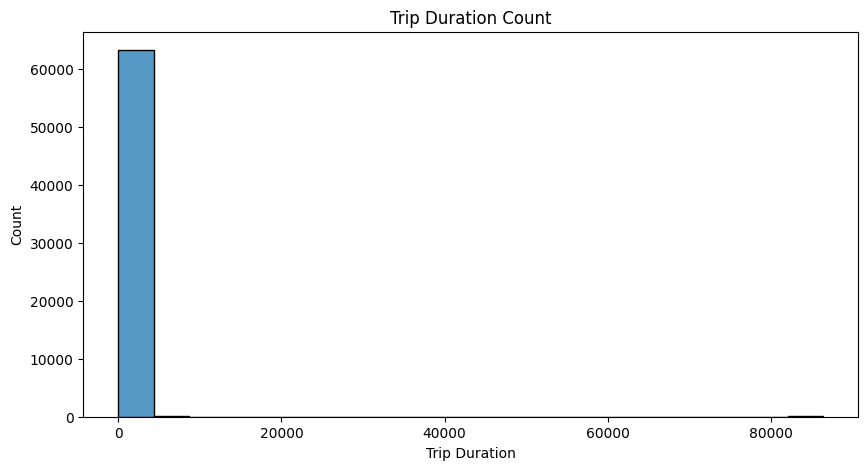

In [110]:
plt.figure(figsize=(10,5)) # Re-sizing graph

sns.histplot(tlc['Trip_Duration'],kde=False,bins=20) # Graph code
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.title('Trip Duration Count')
plt.show() # Showing the graph without its calculations

As we can see, the plot is really skewed. Let's check the boxplot.

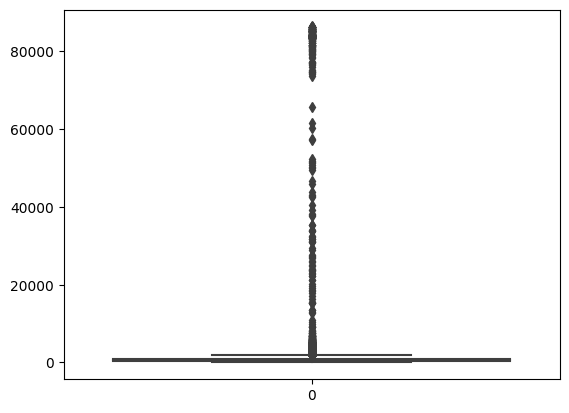

In [111]:
sns.boxplot(tlc['Trip_Duration'])
plt.show()

From the boxplot, we can see that Taxi & Limousine Services are usually used for short amount of time. But, let's check if there is a duration of 0.

In [112]:
tlc[tlc['Trip_Duration']==0]

,LPEP_ID,PU_DateTime,DO_DateTime,Reserved_Status,RatecodeID,PULocationID,DOLocationID,Passenger_Qty,Distance,Base_Fare,...,Congestion_SCG,PU_Hour,DO_Hour,PU_TimeDay,DO_TimeDay,PU_Day,DO_Day,Trip_Duration,PULocation Name,DOLocation Name
1241,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1,226,264,1,0.00,3.0,...,0.00,22,22,Late night,Late night,Sunday,Sunday,0,Queens,Unknown
2006,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1,3,264,2,0.00,24.0,...,0.00,15,15,Afternoon,Afternoon,Monday,Monday,0,Bronx,Unknown
2079,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1,264,264,1,0.00,3.0,...,0.00,15,15,Afternoon,Afternoon,Monday,Monday,0,Unknown,Unknown
2336,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1,145,264,1,0.00,3.7,...,0.00,18,18,Evening,Evening,Monday,Monday,0,Queens,Unknown
2696,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5,255,264,2,0.00,40.0,...,0.00,22,22,Late night,Late night,Monday,Monday,0,Brooklyn,Unknown
2782,1,2023-01-03 03:50:19,2023-01-03 03:50:19,Y,5,129,264,3,0.00,0.0,...,0.00,3,3,Late night,Late night,Tuesday,Tuesday,0,Queens,Unknown
3258,1,2023-01-03 10:16:41,2023-01-03 10:16:41,Y,1,74,264,1,0.00,9.5,...,0.00,10,10,Morning,Morning,Tuesday,Tuesday,0,Manhattan,Unknown
3574,1,2023-01-03 13:51:21,2023-01-03 13:51:21,Y,1,18,264,1,0.00,41.7,...,0.00,13,13,Afternoon,Afternoon,Tuesday,Tuesday,0,Bronx,Unknown
3681,1,2023-01-03 14:46:21,2023-01-03 14:46:21,Y,1,16,264,1,0.00,41.7,...,0.00,14,14,Afternoon,Afternoon,Tuesday,Tuesday,0,Queens,Unknown
4043,1,2023-01-03 16:50:53,2023-01-03 16:50:53,Y,1,97,264,1,0.00,7.9,...,0.00,16,16,Afternoon,Afternoon,Tuesday,Tuesday,0,Brooklyn,Unknown


There are exactly 59 rows of potential cancelled trips.

#### **b. LPEP_ID countplot**

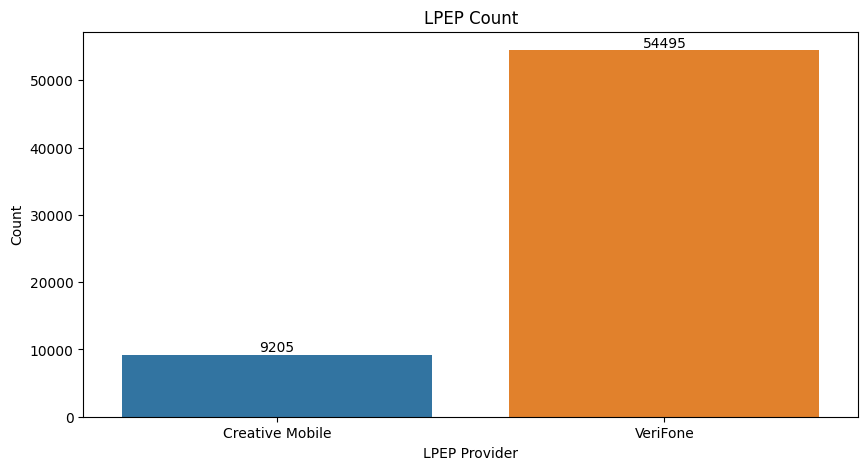

In [113]:
labels = ['Creative Mobile','VeriFone'] # Label names
plt.figure(figsize=(10,5))
ax = sns.countplot(x='LPEP_ID',data=tlc) # being hold in ax variable for customization
ax.bar_label(ax.containers[0]) # labeling bars with their values
plt.xlabel('LPEP Companies')
plt.ylabel('Count')
plt.title('LPEP Count') # title name
plt.xticks(range(2),labels) # renaming each bar labels with 'labels' variable
plt.show()

Turns out, New York TLC's data leans more to VeriFone. Which means trips from our passengers, without realising uses taxi/limousine with VeriFone LPEP more often than Creative Mobile.

#### **c. Passenger count, value counts barplot**

In [114]:
tlc.Passenger_Qty.value_counts()

Passenger_Qty
1    54161
2     5061
5     1768
6     1053
3      951
4      362
0      336
7        4
9        2
8        2
Name: count, dtype: int64

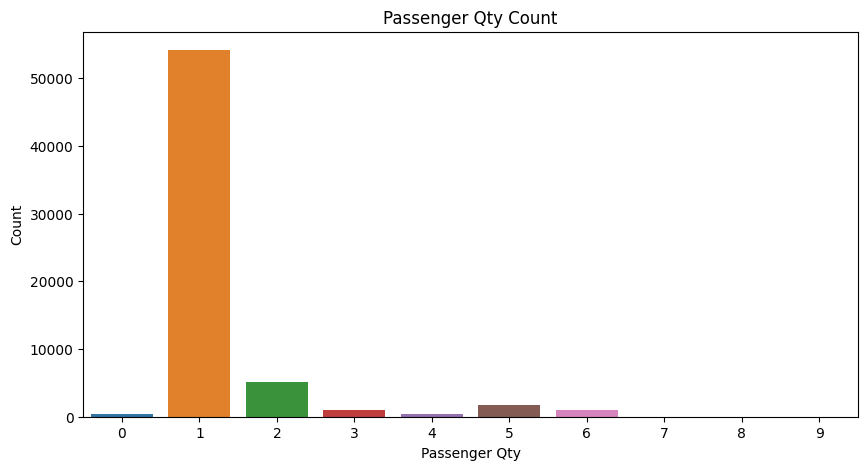

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x='Passenger_Qty',data=tlc)
plt.xlabel('Passenger Qty')
plt.ylabel('Count')
plt.title('Passenger Qty Count')
plt.show()

There are some trips with 0 passengers which could be a human error, considering there is around 330 data. <br>
And trips with 7/8/9 passengers has a low amount of distribution and does not seem realistic. Let's drop those.

In [116]:
tlc = tlc[tlc['Passenger_Qty']!=0] # replacing our dataframe with non-zeroes
tlc = tlc[tlc['Passenger_Qty']<=6] # replacing our dataframe with those who are less or equals to 6

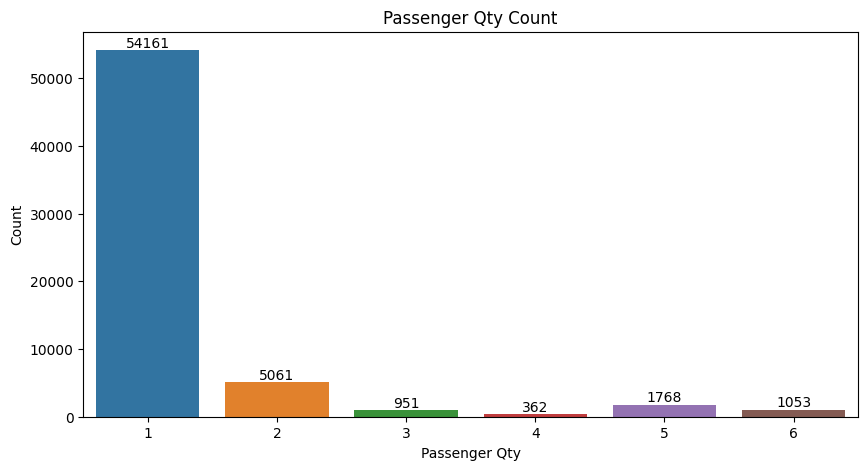

In [117]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Passenger_Qty',data=tlc)
ax.bar_label(ax.containers[0])
plt.xlabel('Passenger Qty')
plt.ylabel('Count')
plt.title('Passenger Qty Count')
plt.show()

The data distribution looks better although it's still skewed on 1 Passenger.

#### **d. Store and forward & distance value counts**

In [118]:
tlc.Reserved_Status.value_counts()

Reserved_Status
N    63049
Y      307
Name: count, dtype: int64

There are less reservation made for taxi/limousine! That means passengers prefer on the spot method.

#### **e. Distance value counts**

In [119]:
tlc.Distance.value_counts()

Distance
0.00     3085
1.40      614
1.30      553
1.20      502
1.50      471
         ... 
9.88        1
13.61       1
20.96       1
24.94       1
16.41       1
Name: count, Length: 1724, dtype: int64

There are exactly 3128 trips with 0 distance.

The possibilities of these trips are:
- dropoff location could not be tracked.
- driver took the ride to complete their quota.
- the passengers cancelled the trip.

Further analysis in Bi-Variate section.

#### **f. Trips per days**

In [120]:
display(tlc.PU_Day.value_counts())
tlc.DO_Day.value_counts()

PU_Day
Tuesday      10516
Thursday      9463
Monday        9313
Wednesday     9233
Friday        9229
Saturday      7912
Sunday        7690
Name: count, dtype: int64

DO_Day
Tuesday      10503
Thursday      9438
Monday        9323
Wednesday     9250
Friday        9224
Saturday      7904
Sunday        7714
Name: count, dtype: int64

As PU_Day and DO_Day value counts has similar counts, we can use either one to represent the other. Personally, I'll use PU_Day

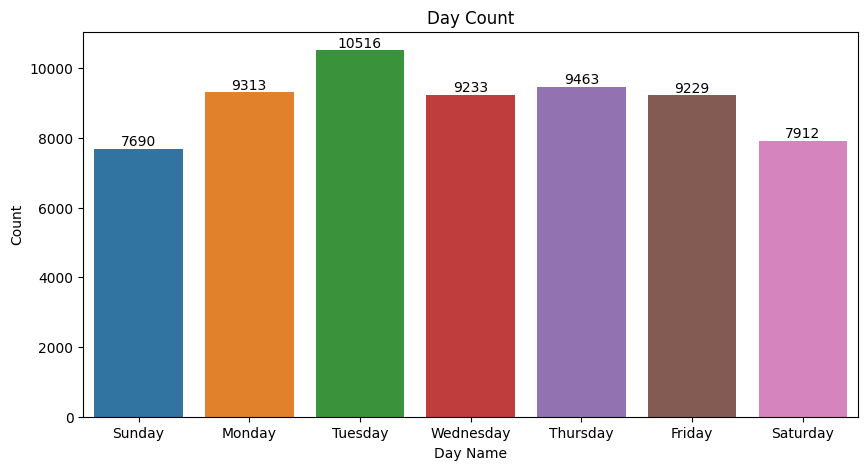

In [121]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x='PU_Day',data=tlc)
ax.bar_label(ax.containers[0])
plt.xlabel('Day Name')
plt.ylabel('Count')
plt.title('Day Count')
plt.show()

It turns out that passengers has a high demand for taxis and limousines on Tuesday. With similar demands on weekdays and low demand on weekends.

#### **g. Trips per hour**

In [122]:
display(tlc.PU_Hour.value_counts())
tlc.DO_Hour.value_counts()

PU_Hour
16    4953
18    4936
17    4897
15    4838
14    4117
19    4046
13    3717
12    3506
11    3403
10    3310
9     3164
20    3092
8     2890
7     2408
21    2275
22    1792
23    1386
0     1030
6      885
1      809
2      583
3      545
4      397
5      377
Name: count, dtype: int64

DO_Hour
18    5065
16    5025
17    4869
15    4588
19    4356
14    4051
13    3575
12    3469
11    3409
20    3288
10    3258
9     3155
8     2773
21    2391
7     2147
22    1880
23    1438
0     1159
1      828
6      669
2      613
3      553
4      447
5      350
Name: count, dtype: int64

Hour has the same attribute as Day, which has similar value counts, but in this case, we have more labels. Due to that, the chart will be more sensitive towards the differences, so we will separate it between PU and DO.

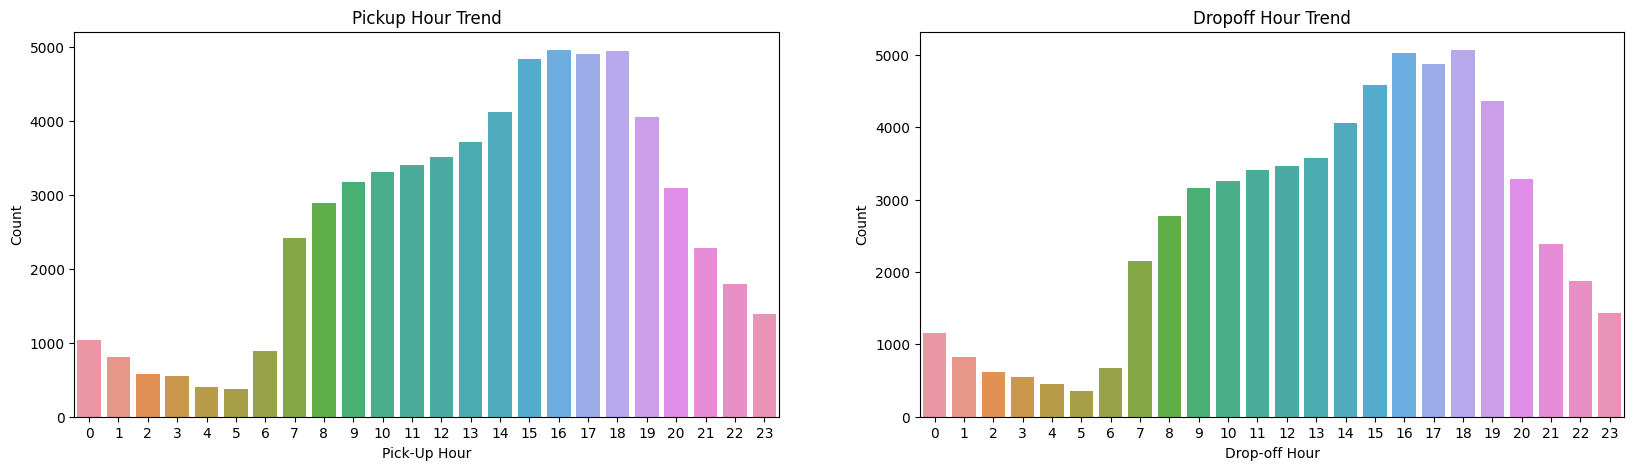

In [123]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Hour Trend')
sns.countplot(x="PU_Hour",data=tlc,ax=ax9)
ax9.set_ylabel('Count')
ax9.set_xlabel('Pick-Up Hour')

ax10.set_title('Dropoff Hour Trend')
sns.countplot(x="DO_Hour",data=tlc,ax=ax10)
ax10.set_ylabel('Count')
ax10.set_xlabel('Drop-off Hour')


plt.show()

Pickup Hours peaked around 15.00-18.00 which are right before congestion hours. After congestion surcharge are applied on 19.00, people tend to opt for public transportation instead.

#### **h. Trips per time of day**

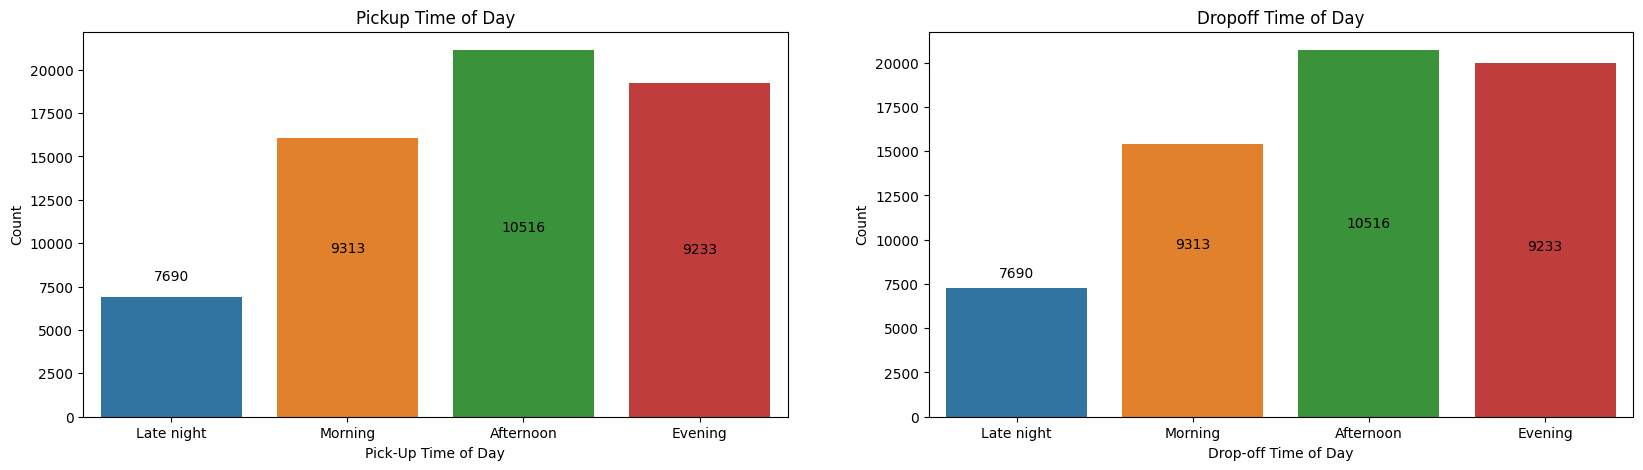

In [124]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5)) # ncols specifies how many columns to fit in subplots
# figure variable holds the entire figure of both subplots, (ax3,ax4) variable holds the axes objects for the 2 subplots for customization
ax3.set_title('Pickup Time of Day')
sns.countplot(x="PU_TimeDay",data=tlc,ax=ax3)
ax3.bar_label(ax.containers[0])
ax3.set_ylabel('Count')
ax3.set_xlabel('Pick-Up Time of Day')

ax4.set_title('Dropoff Time of Day')
sns.countplot(x="DO_TimeDay",data=tlc,ax=ax4)
ax4.bar_label(ax.containers[0])
ax4.set_ylabel('Count')
ax4.set_xlabel('Drop-off Time of Day')

plt.show()

Since 15.00-16.00 falls into Afternoon Category and 17.00-19.00 falls into Evening, we should focus on providing more services starting from afternoon.

#### **i. Distance Boxplot**

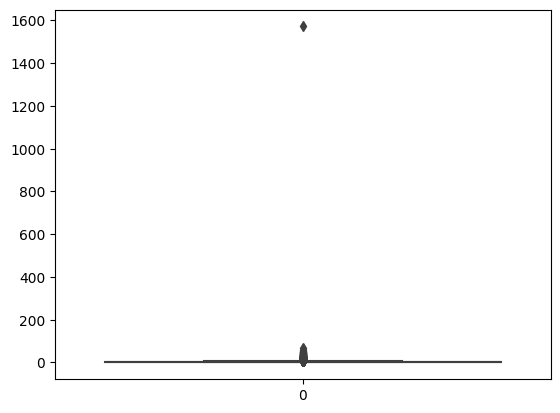

In [125]:
sns.boxplot(tlc['Distance'])
plt.show()

There is 1 outlier, let's drop that one.

In [126]:
tlc = tlc[tlc['Distance']<200]

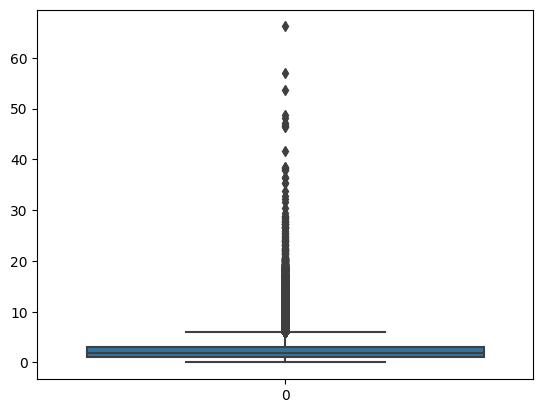

In [127]:
sns.boxplot(tlc['Distance'])
plt.show()

Now the distribution looks closer.

### **3. Bi-Variate**

#### **a. Trip Duration per Vendor**

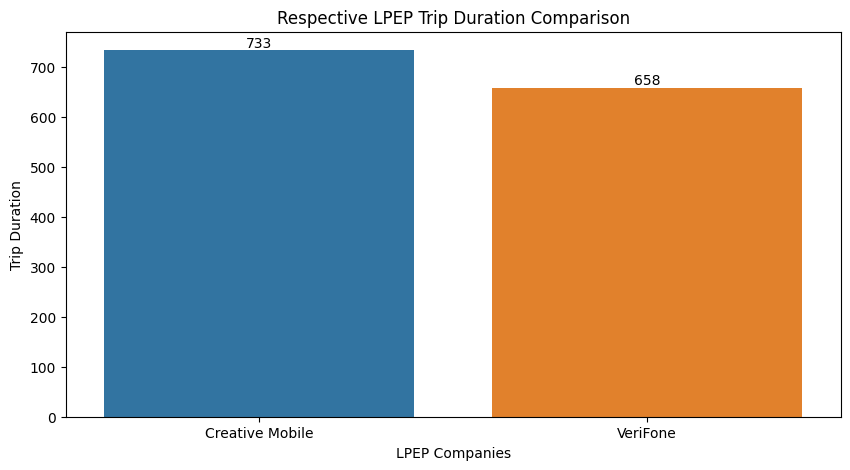

In [154]:
plt.figure(figsize=(10,5))

ax = sns.barplot(y='Trip_Duration',x='LPEP_ID',data=tlc,ci=None,estimator=np.median)

ax.bar_label(ax.containers[0])

plt.title('Respective LPEP Trip Duration Comparison')
plt.xlabel('LPEP Companies')
plt.ylabel('Trip Duration')
plt.xticks(range(2),labels)
plt.show()

Although Creative Mobile already had a low number of trips, they had longer trip duration. This could be the reason of their low numbers.

#### **b. Trips Duration per Reserved Status**

<Figure size 1000x500 with 0 Axes>

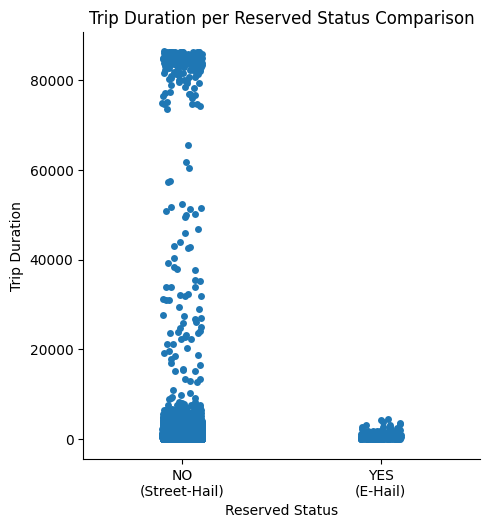

In [145]:
plt.figure(figsize=(10,5))

sns.catplot(y='Trip_Duration',x='Reserved_Status',data=tlc,kind='strip', estimator=np.median)

plt.title('Trip Duration per Reserved Status Comparison')
plt.xlabel('Reserved Status')
plt.ylabel('Trip Duration')
lables = ['NO\n(Street-Hail)','YES\n(E-Hail)']
plt.xticks(range(2),lables)
plt.show()

Using catplot to make a relation between numerical data (Trip_Duration) with categorical (Reserved_Status). And we can conclude that on the spot request (Stret-Hails) has longer trips than reserved (E-Hails).

#### **c. Trip Duration per passenger count**

<Figure size 1000x500 with 0 Axes>

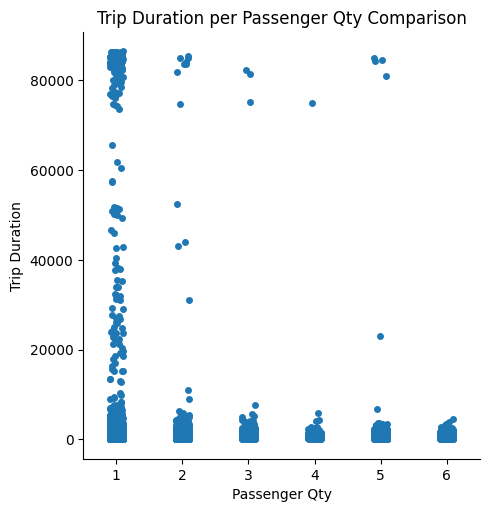

In [146]:
plt.figure(figsize=(10,5))

sns.catplot(y='Trip_Duration',x='Passenger_Qty',data=tlc,kind='strip', estimator=np.median)

plt.title('Trip Duration per Passenger Qty Comparison')
plt.xlabel('Passenger Qty')
plt.ylabel('Trip Duration')

plt.show()

We can see that 1 passenger tends to have longer duration.

#### **d. Trips duration per time of day**

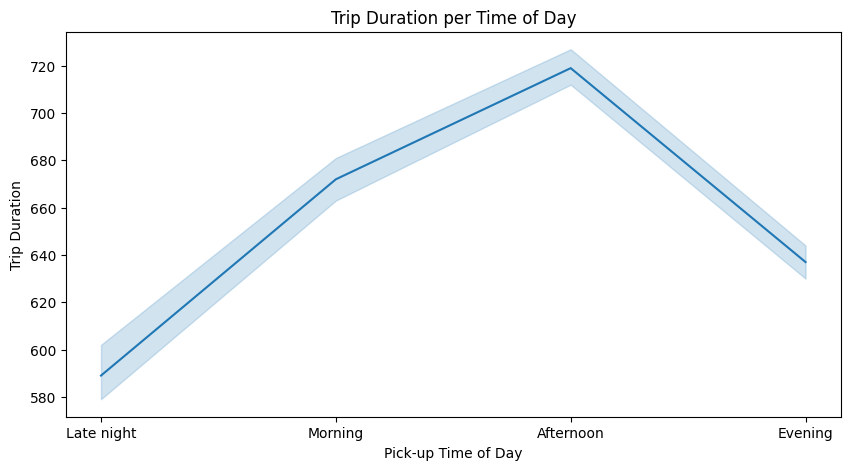

In [147]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_TimeDay',y='Trip_Duration',data=tlc, estimator=np.median)

plt.title('Trip Duration per Time of Day Trend')
plt.xlabel('Pick-up Time of Day')
plt.ylabel('Trip Duration')

plt.show()

Trip duration peaked on the afternoon, which is from 12 to 16. This could be because of business trips (going into the airport) or lunch trips which could cause heavy traffic along the way. <br>
While from Late Night into Morning, we have the lowest because the road is clear.

#### **e. Trip Duration per hour**

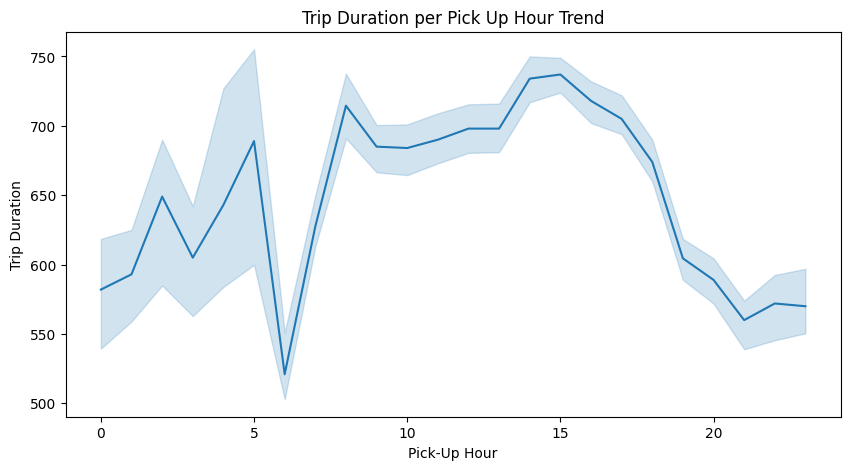

In [148]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_Hour',y='Trip_Duration',data=tlc,estimator=np.median)

plt.title('Trip Duration per Pick Up Hour Trend')
plt.xlabel('Pick-Up Hour')
plt.ylabel('Trip Duration')
plt.show()

Peaked on 15.00

#### **f. Trip Duration per day of the week**

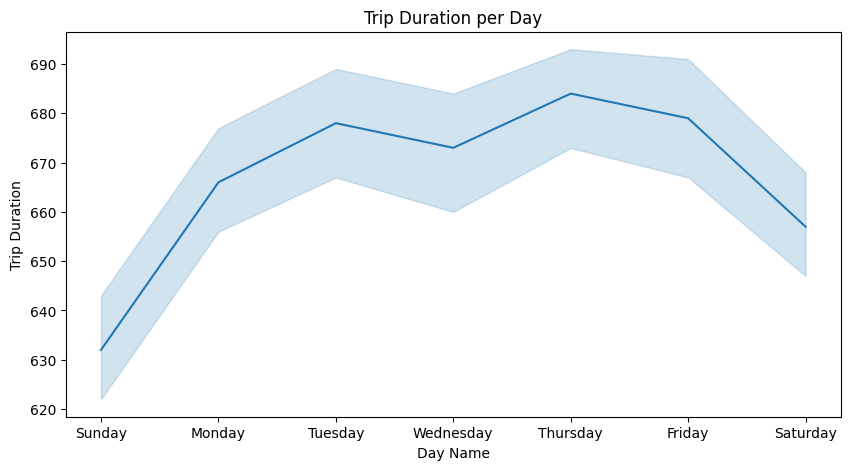

In [153]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_Day', y='Trip_Duration', data=tlc, estimator=np.median)

plt.title('Trip Duration per Day')
plt.xlabel('Day Name')
plt.ylabel('Trip Duration')

plt.show()

Thursday Peak hour.

#### **g. Distance and Vendor**

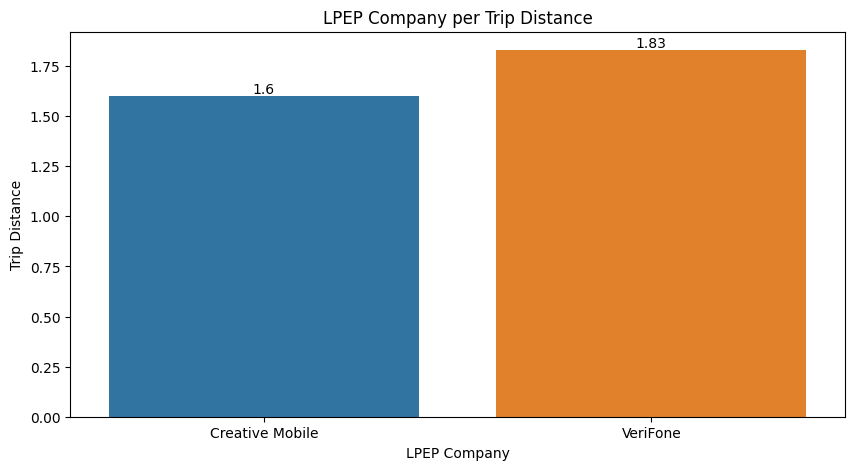

In [155]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='LPEP_ID', y='Distance', data=tlc, ci=None,estimator=np.median)
ax.bar_label(ax.containers[0])

plt.title('LPEP Company per Trip Distance')
plt.xlabel('LPEP Company')
plt.ylabel('Trip Distance')
plt.xticks(range(2),labels)
plt.show()

Although Creative and Verifone has a huge gap on their trip count, Creative Mobile does not fall behind on trip distance.

#### **h. Distance per store and forward**

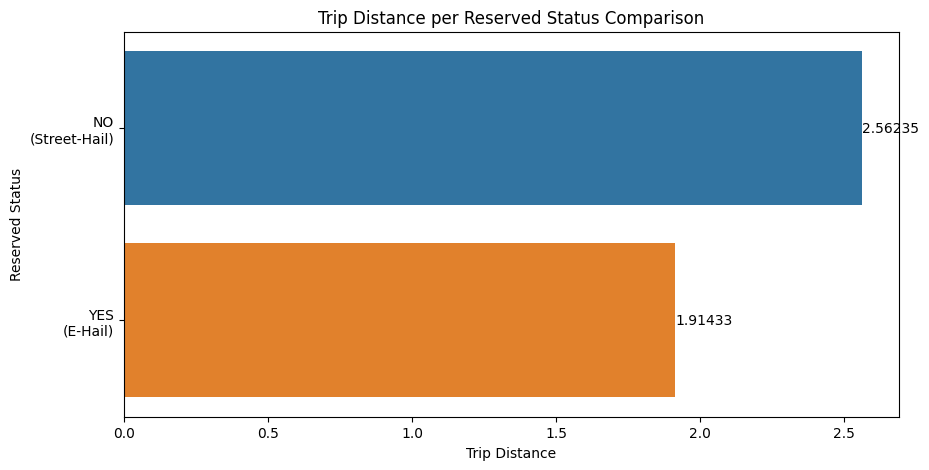

In [156]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Distance', y='Reserved_Status', ci=None,data=tlc)
ax.bar_label(ax.containers[0])

plt.title('Trip Distance per Reserved Status Comparison')
plt.ylabel('Reserved Status')
plt.xlabel('Trip Distance')
lables = ['NO\n(Street-Hail)','YES\n(E-Hail)']
plt.yticks(range(2),lables)
plt.show()

On the spot trip request tends to travel longer distances.

#### **i. Distance per passenger count**

<Figure size 1000x500 with 0 Axes>

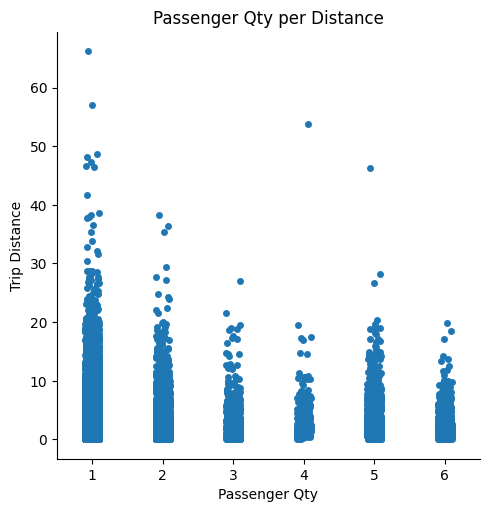

In [157]:
plt.figure(figsize=(10,5))

sns.catplot(y='Distance', x='Passenger_Qty', data=tlc, kind='strip')

plt.title('Passenger Qty per Distance')
plt.xlabel('Passenger Qty')
plt.ylabel('Trip Distance')

plt.show()

Short distance trips does not depend on passenger quantity

#### **j. Distance per day of week**

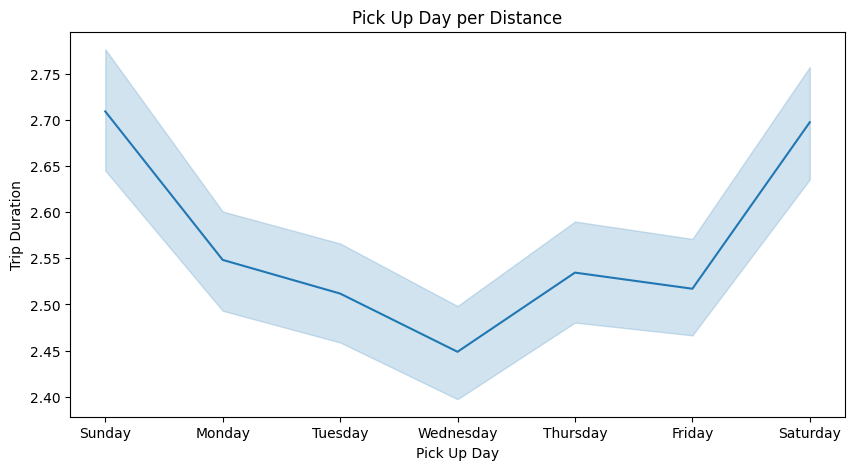

In [161]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_Day', y='Distance', data=tlc)

plt.title('Pick Up Day per Distance')
plt.xlabel('Pick Up Day')
plt.ylabel('Trip Duration')

plt.show()

Althought weekend has less density in terms of quantity, weekend trips have longer distance.

#### **k. Distance per hour of day**

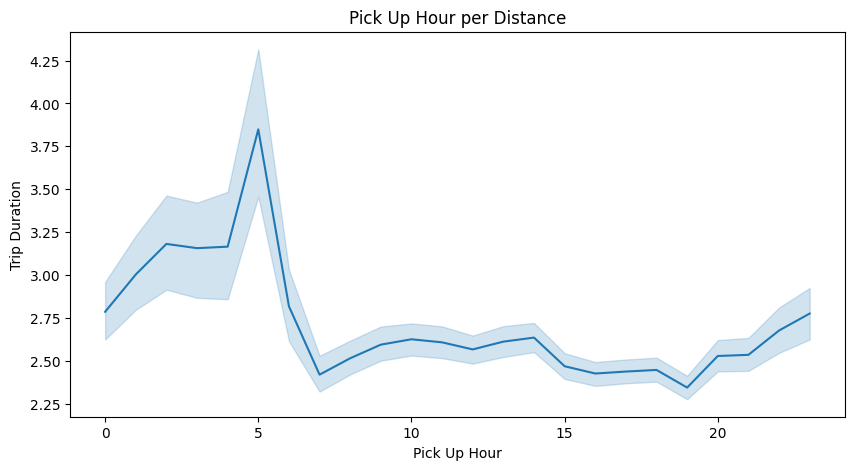

In [173]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_Hour', y='Distance', data=tlc)

plt.title('Pick Up Hour per Distance')
plt.xlabel('Pick Up Hour')
plt.ylabel('Trip Duration')

plt.show()

We peaked at 05.00 which is early in the morning, this could be because of Passengers that uses for-hire services tends to be working individuals getting to work.

#### **l. Distance per time of day**

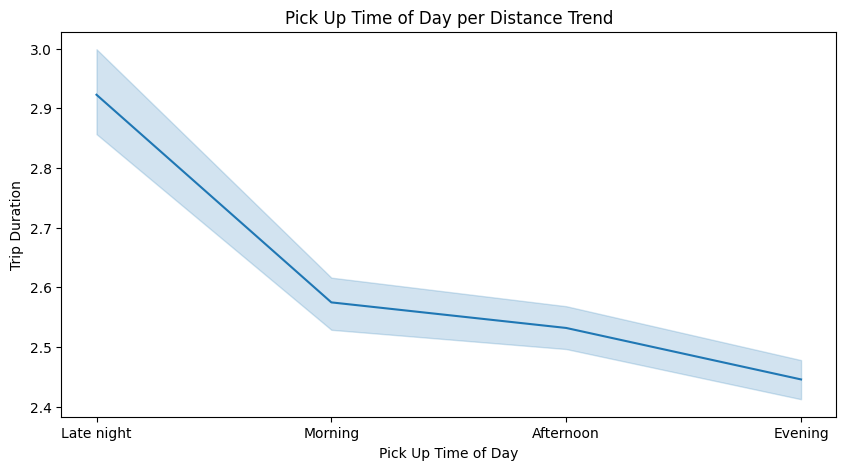

In [174]:
plt.figure(figsize=(10,5))

sns.lineplot(x='PU_TimeDay', y='Distance', data=tlc)

plt.title('Pick Up Time of Day per Distance Trend')
plt.xlabel('Pick Up Time of Day')
plt.ylabel('Trip Duration')

plt.show()

Since 05.00 are still considered late night.

#### **Region Scatterplot**

<Figure size 500x1000 with 0 Axes>

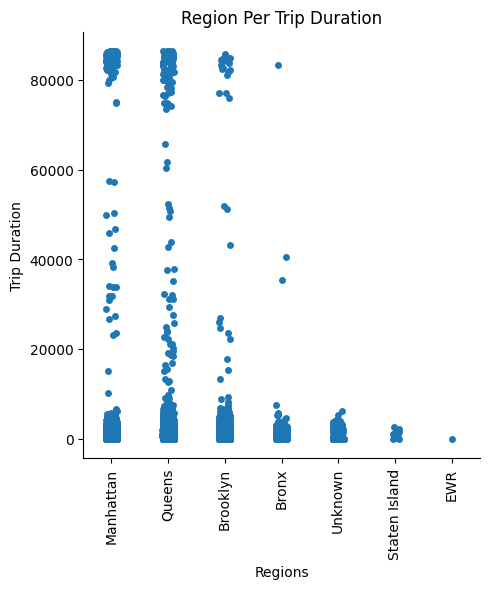

In [175]:
plt.figure(figsize=(5,10))

sns.catplot(x= tlc['PULocation Name'], y= tlc['Trip_Duration'], kind='strip')

plt.title('Region Per Trip Duration')
plt.xlabel('Regions')
plt.ylabel('Trip Duration')
plt.xticks(rotation=90)
plt.show()

In [141]:
tlc['DOLocation Name'].value_counts()

DOLocation Name
Manhattan        37154
Queens           16619
Brooklyn          6900
Bronx             2019
Unknown            627
EWR                 20
Staten Island       16
Name: count, dtype: int64

### **4. Conclusion**

In the analysis of the dataset, several key insights were uncovered. Notably, there were 59 potential canceled trips, and VeriFone LPEP was the preferred choice for passengers compared to Creative Mobile. Most trips involved a single passenger, resulting in a skewed distribution. Additionally, there were fewer reservations, indicating a preference for on-the-spot bookings. Surprisingly, over 3,000 trips had zero distance, potentially due to untracked drop-offs, quota-driven drivers, or passenger cancellations. Demand for taxi and limousine services peaked on Tuesdays and weekdays, with peak pickup times in the late afternoon, just before congestion surcharge hours. Creative Mobile had longer trip durations despite fewer trips, and on-the-spot requests generally led to longer trips. It's worth noting that the data does not follow a normal distribution. Overall, these findings provide valuable insights into passenger behavior, demand patterns, and trip characteristics that can inform service providers and decision-making processes.

### **5. Recommendation**

To optimize taxi and limousine services based on the analysis findings, several recommendations emerge. It's advisable to increase service availability on Tuesdays, particularly during the afternoon peak hours from 14:00 to 16:00, with a focus on the Manhattan area. This strategy can cater to high passenger demand, especially before congestion hours at 19:00 when commuters tend to switch to public transportation. Furthermore, a crucial step involves reviewing and aligning fare structures with TLC regulations, setting the MTA_Tax at a consistent $0.50, and adjusting the Improvement_SCG to 1 USD in line with [New York Goverment](https://www.tax.ny.gov/bus/taxi/#:~:text=The%20taxicab%20and%20hail%20vehicle%20trip%20tax%20in,Queens%2C%20Richmond%20%28Staten%20Island%29%2C%20and%20Bronx%20counties%29%3B%20or)'s Policy's policy. Additional suggestions include implementing a policy for trips with zero passenger counts, regularly assessing voided trips, and actively collecting and analyzing customer reviews to further enhance service quality and passenger satisfaction. These measures collectively contribute to an improved and well-regulated taxi and limousine service experience.
